# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}'
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | savanna-la-mar
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | sarh
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | xilin hot
Processing Record 7 of Set 1 | sinabang
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | zaraysk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | chik ballapur
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | al jawf
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | maceio
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | enewetak
Processing Recor

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,savanna-la-mar,18.2190,-78.1332,301.12,85,14,1.32,JM,1695090690
1,bethel,41.3712,-73.4140,289.32,88,68,0.89,US,1695090547
2,waitangi,-43.9535,-176.5597,286.38,77,1,3.58,NZ,1695090690
3,sarh,9.1429,18.3923,297.10,100,20,1.54,TD,1695090691
4,puerto ayora,-0.7393,-90.3518,296.79,97,27,2.68,EC,1695090691


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,savanna-la-mar,18.2190,-78.1332,301.12,85,14,1.32,JM,1695090690
1,bethel,41.3712,-73.4140,289.32,88,68,0.89,US,1695090547
2,waitangi,-43.9535,-176.5597,286.38,77,1,3.58,NZ,1695090690
3,sarh,9.1429,18.3923,297.10,100,20,1.54,TD,1695090691
4,puerto ayora,-0.7393,-90.3518,296.79,97,27,2.68,EC,1695090691


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [26]:
print(city_data[0])

{'City': 'savanna-la-mar', 'Lat': 18.219, 'Lng': -78.1332, 'Max Temp': 301.12, 'Humidity': 85, 'Cloudiness': 14, 'Wind Speed': 1.32, 'Country': 'JM', 'Date': 1695090690}


In [27]:
import os
print(os.getcwd())

/Users/admin/Downloads/Starter_Code-Module-6/starter_code


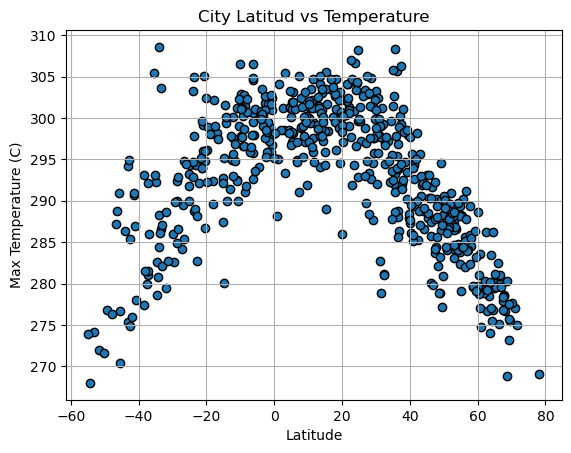

In [28]:
# Build scatter plot for latitude vs. temperature
x_values = [city['Lat'] for city in city_data] 
y_values = [city['Max Temp'] for city in city_data]
plt.scatter(x_values,y_values,edgecolors='black')


# Incorporate the other graph properties
plt.title('City Latitud vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.show()

# Save the figure
#plt.savefig("starter_code/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

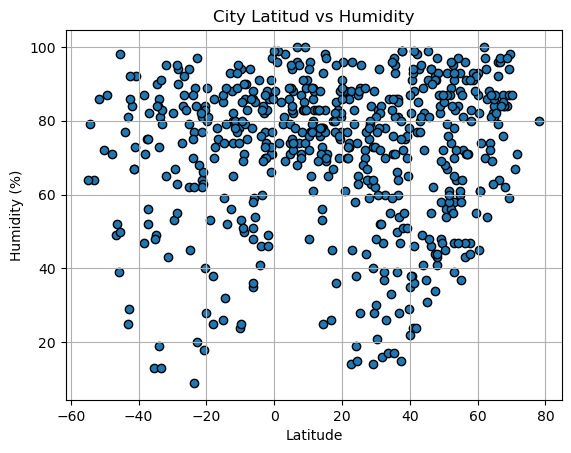

In [29]:
# Build the scatter plots for latitude vs. humidity
x_values = [city['Lat'] for city in city_data] 
y_values = [city['Humidity'] for city in city_data]
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitud vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

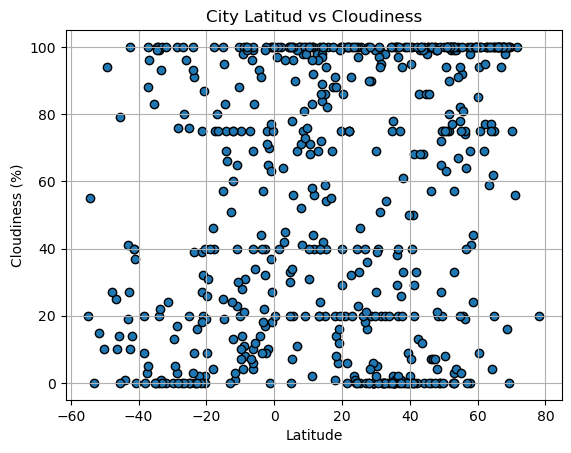

In [30]:
# Build the scatter plots for latitude vs. humidity
x_values = [city['Lat'] for city in city_data] 
y_values = [city['Cloudiness'] for city in city_data]
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitud vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

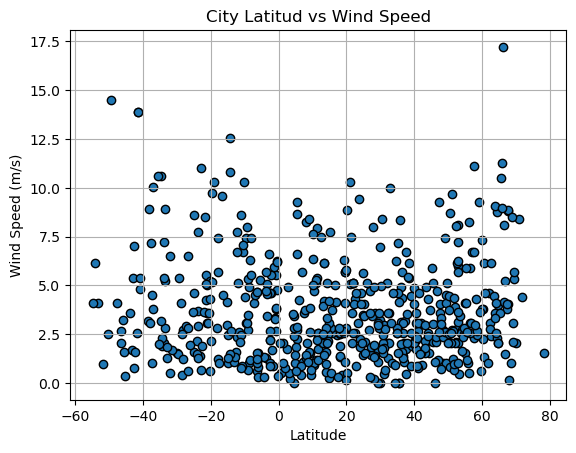

In [31]:
# Build the scatter plots for latitude vs. humidity
x_values = [city['Lat'] for city in city_data] 
y_values = [city['Wind Speed'] for city in city_data]
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitud vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.show()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
from scipy import stats

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates,ylim=None): 
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)



# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [34]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,savanna-la-mar,18.2190,-78.1332,301.12,85,14,1.32,JM,1695090690
1,bethel,41.3712,-73.4140,289.32,88,68,0.89,US,1695090547
3,sarh,9.1429,18.3923,297.10,100,20,1.54,TD,1695090691
5,xilin hot,43.9667,116.0333,288.75,41,68,4.28,CN,1695090691
6,sinabang,2.4803,96.3801,301.23,79,64,1.74,ID,1695090691


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,286.38,77,1,3.58,NZ,1695090690
4,puerto ayora,-0.7393,-90.3518,296.79,97,27,2.68,EC,1695090691
9,avarua,-21.2078,-159.7750,295.18,64,75,3.09,CK,1695090585
12,grytviken,-54.2811,-36.5092,268.00,79,55,6.15,GS,1695090692
15,puerto natales,-51.7236,-72.4875,272.00,86,15,0.99,CL,1695090367


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8210148569595973


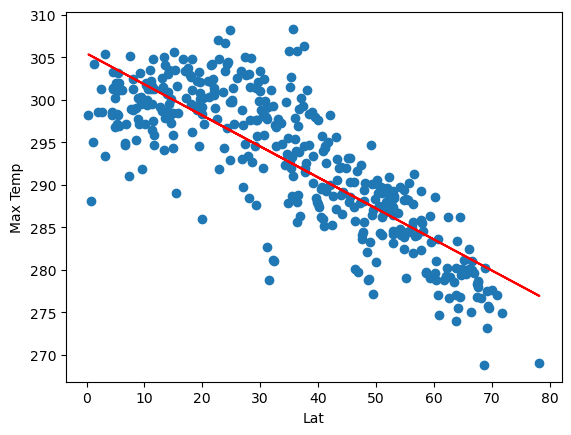

In [55]:
# Linear regression on Northen Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (0,0))


The r-value is: 0.7449787742521606


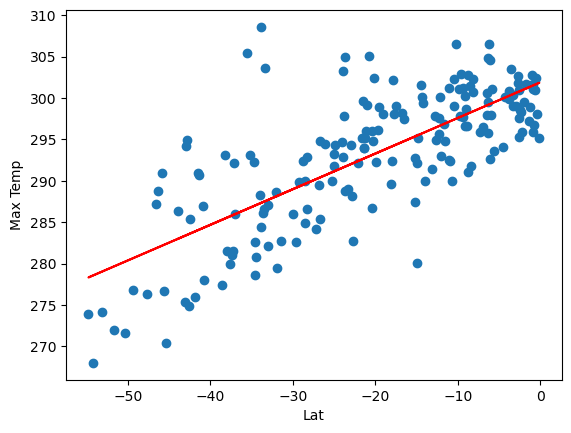

In [56]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (0,0))


**Discussion about the linear relationship:** 

There is a strong negative correlation in the Northen Hemisphere between the temperature vs the latitud

There is a strong positive correlation in the Southern Hemisphere between the tempreature vs the latitud

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03557314579504639


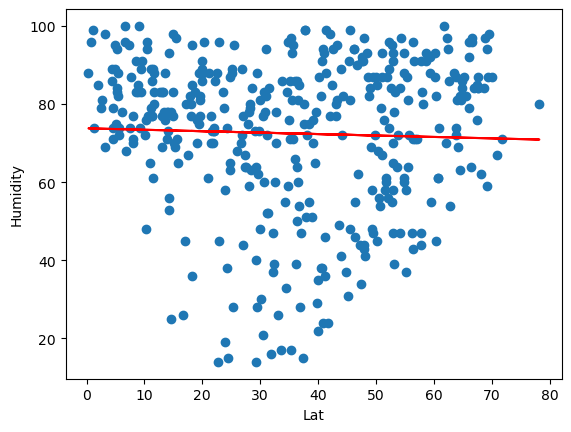

In [57]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],(0,0))


The r-value is: 0.0881446720905371


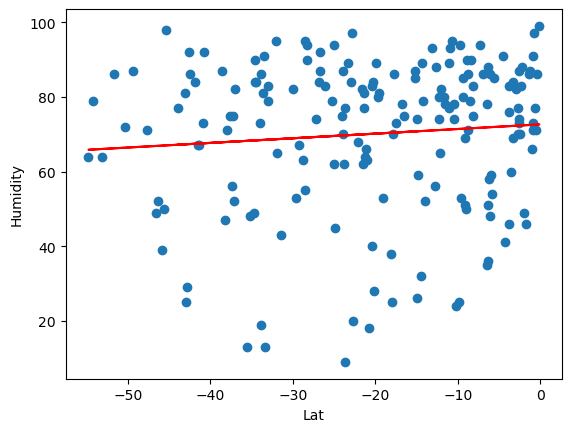

In [58]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (0,0))


**Discussion about the linear relationship:**

The correlation of Humidty in both Northern and Southern hemispheres has a slight correlation with the latitude, for the Northern H it seems slighlty negative while the Southern H is slighty positive.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08854477613069923


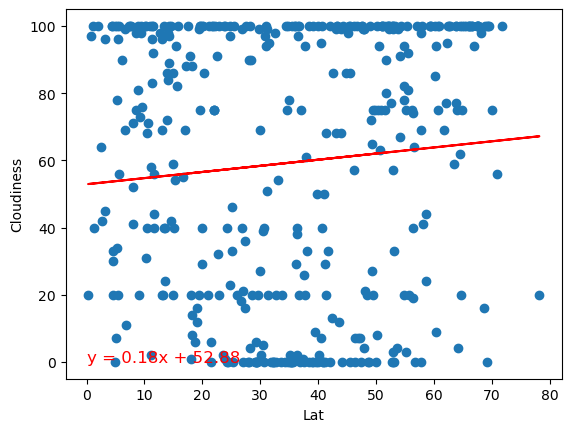

In [59]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (0,0))


The r-value is: 0.1778088678732884


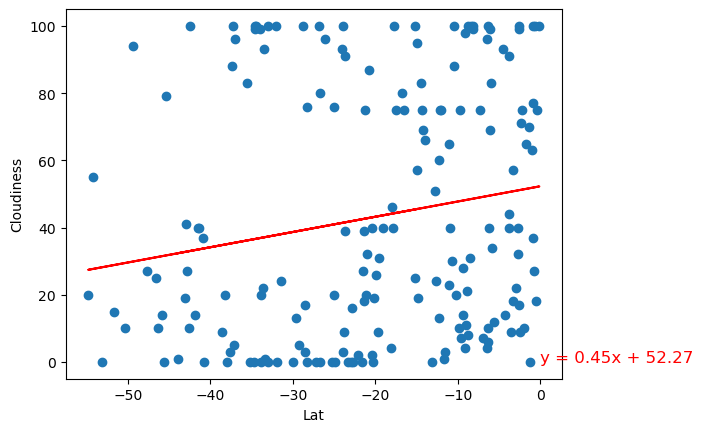

In [60]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (0,0))


**Discussion about the linear relationship:** 

The correlation of Cloudiness vs Latitud is a bit more pronunced than the previous, Humidity, but in this case it is positve for both hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17795209341815563


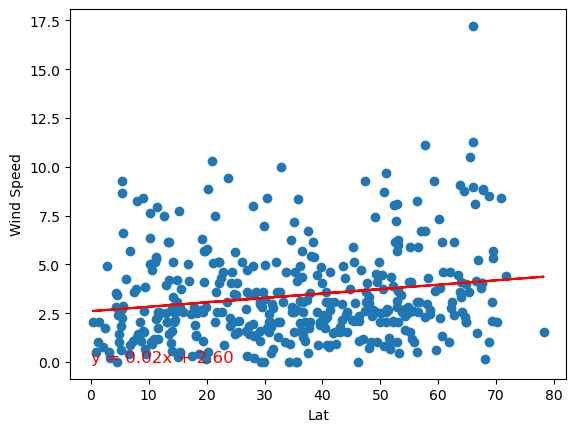

In [61]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (0,0))


The r-value is: -0.10890732499268184


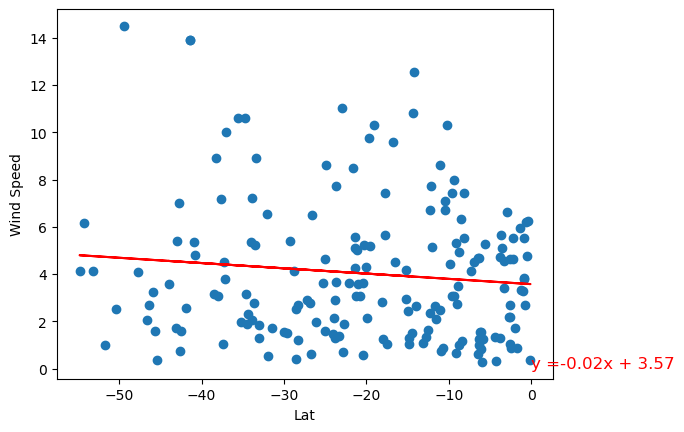

In [62]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (0,0))


**Discussion about the linear relationship:**

The correlation for both of the hemispheres is weak, Northern is weak but positive, while the Southern is weak and negative.